<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
Fitting 3 folds for each of 72 candidates, totalling 216 fits
n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 

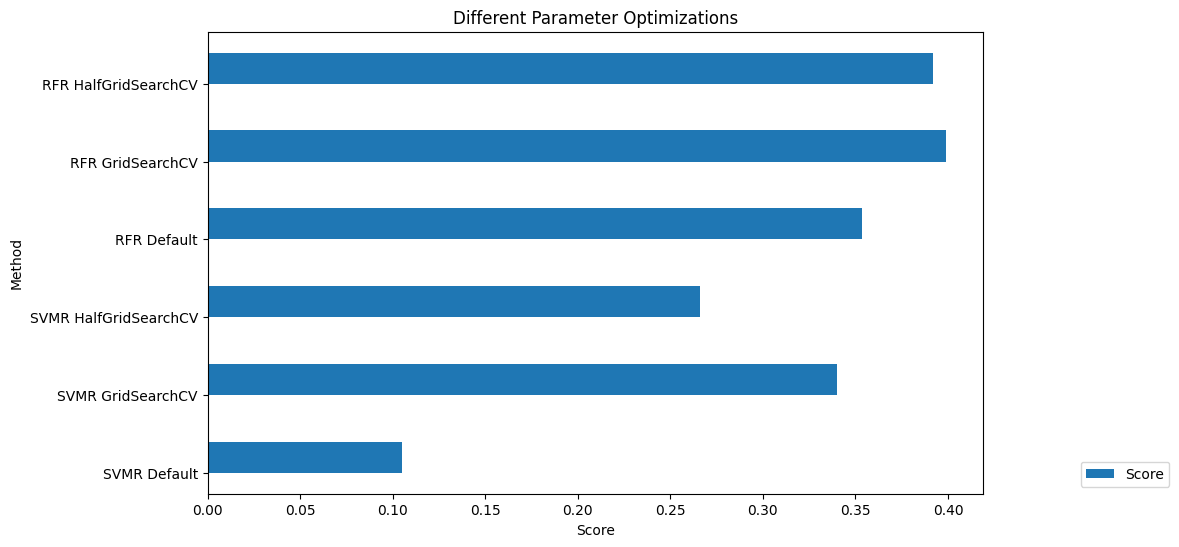

In [73]:
#SOURCES:
#https://www.tutorialspoint.com/how-to-implement-linear-classification-with-python-scikit-learn
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor
#https://github.com/COSC5557/warmup-Sanjeeb-PL/blob/main/warmup.ipynb
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
#https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py
#https://scikit-learn.org/stable/modules/tree.html
#https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles
#https://scikit-learn.org/stable/modules/svm.html
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR
#https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
#https://scikit-learn.org/stable/modules/grid_search.html#grid-search
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
#https://scikit-learn.org/stable/modules/grid_search.html#successive-halving-user-guide
#https://www.youtube.com/watch?v=c4mS7KaOIGY
#https://scikit-learn.org/stable/modules/svm.html#svm-regression
#https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html#sphx-glr-auto-examples-compose-plot-compare-reduction-py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sb
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
#Put the white wine dataset into a dataframe
path = 'H:\ML\Warmup\HyperparameterOptimization\winequality-white.csv'
wine = pd.read_csv(path, sep=';', header = 'infer')
#Get some info on the wine dataframe
wine.info()
wine.describe().T
qualityCol = wine.pop("quality")
x_train, x_test, y_train, y_test = train_test_split(wine, qualityCol, train_size=.2)

#Create a Support Vector Machine
svmModel = svm.SVR()
svmModelD = svmModel.fit(x_train, y_train)
y_predSVM = svmModelD.predict(x_test)
pipe = Pipeline([('scaler',MinMaxScaler()),('svr', svm.SVR())])
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [3,6,9]
gamma = ['scale','auto']
C = [0.8,1.0,1.2]
cache_size = [1000]

parametersSVM = {
    'svr__kernel': kernel,
    'svr__degree': degree,
    'svr__gamma' : gamma,
    'svr__C': C,
    'svr__cache_size' : cache_size
}

#scalX = StandardScaler()
#scalY = StandardScaler()
#tranX = scalX.fit_transform(x_train)
#tranY = scalY.fit_transform(y_train)

svmGridCV = GridSearchCV(error_score=np.nan, estimator = pipe,param_grid = parametersSVM, cv = 3, n_jobs = 12,verbose = 2)
svmGridCV.fit(x_train, y_train)

svmHalfGridCV = HalvingGridSearchCV(error_score=np.nan, estimator = pipe,param_grid = parametersSVM, cv = 3, n_jobs = 12,verbose = 2)
svmHalfGridCV.fit(x_train, y_train)

#Create a Random Forest
rfModel = RandomForestRegressor()
rfModelD = rfModel.fit(x_train, y_train)
y_predRF = rfModelD.predict(x_test)
n_estimators = [int(x) for x in np.linspace(10,100,num =10)]
max_features = [None, 'sqrt']
max_depth = [None,2,4]
main_samples_split = [2]
bootstrap = [True, False]
parameters = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split' : main_samples_split,
    'max_features': max_features,
    'bootstrap':  bootstrap
}


rfGridCV = GridSearchCV(error_score=np.nan, estimator = rfModel,param_grid = parameters, cv = 3, n_jobs = 12,verbose = 2)
rfGridCV.fit(x_train, y_train)

rfHalfGridCV = HalvingGridSearchCV(error_score=np.nan, estimator = rfModel,param_grid = parameters, cv = 3, n_jobs = 12,verbose = 2)
rfHalfGridCV.fit(x_train, y_train)
#RF
print('RF Default')
print("Coefficient of determination of RF: %.2f" % r2_score(y_test, y_predRF))
print('RF GridSearchCV')
print('Best Score: %s' % rfGridCV.best_score_)
print('Best Parameters: %s' % rfGridCV.best_params_)
print('RF HalfGridSearchCV')
print('Best Score: %s' % rfHalfGridCV.best_score_)
print('Best Parameters: %s' % rfHalfGridCV.best_params_)
#SVM
print('SVM Default')
print("Coefficient of determination of SVM: %.2f" % r2_score(y_test, y_predSVM))
print('RF GridSearchCV')
print('Best Score: %s' % svmGridCV.best_score_)
print('Best Parameters: %s' % svmGridCV.best_params_)
print('RF HalfGridSearchCV')
print('Best Score: %s' % svmHalfGridCV.best_score_)
print('Best Parameters: %s' % svmHalfGridCV.best_params_)
methods = ['SVMR Default', 'SVMR GridSearchCV', 'SVMR HalfGridSearchCV','RFR Default', 'RFR GridSearchCV', 'RFR HalfGridSearchCV']
scores = [r2_score(y_test, y_predSVM), svmGridCV.best_score_, svmHalfGridCV.best_score_, r2_score(y_test, y_predRF), rfGridCV.best_score_, rfHalfGridCV.best_score_]
plt.figure(figsize = (10,6))
plt.barh(methods, scores, align = 'edge', height = 0.4)

plt.legend({'Score':'blue'}, loc='lower right', bbox_to_anchor=(1.25, 0))
plt.xlabel("Score")
plt.ylabel("Method")
plt.title("Different Parameter Optimizations")
plt.show()

